In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head().T

,0,1,2,3,4
house_pk,84561,84561,84561,84561,84561
agency_id,90,90,90,90,90
date_in,2016-08-27,2016-08-26,2016-08-25,2016-08-24,2016-08-23
price,532,588,588,588,588
dis_water_real,0.261,0.261,0.261,0.261,0.261
dis_shopping,3,3,3,3,3
no_bedrooms,3,3,3,3,3
max_persons,4,4,4,4,4
house_size,140,140,140,140,140
land_size,726,726,726,726,726


In [4]:
df.shape

(85195, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85195 entries, 0 to 85194
Data columns (total 20 columns):
house_pk           85195 non-null int64
agency_id          85195 non-null int64
date_in            85195 non-null object
price              85195 non-null int64
dis_water_real     85195 non-null float64
dis_shopping       85195 non-null float64
no_bedrooms        85195 non-null int64
max_persons        85195 non-null int64
house_size         85195 non-null int64
land_size          85195 non-null int64
build_year         85195 non-null int64
renovation_year    85195 non-null int64
apartment          85195 non-null int64
indoor_pool        85195 non-null int64
spa                85195 non-null int64
internet           85195 non-null int64
pets_allowed       85195 non-null int64
water_view         85195 non-null int64
fire_stove         85195 non-null int64
agency_rating      85195 non-null float64
dtypes: float64(3), int64(16), object(1)
memory usage: 13.0+ MB


In [6]:
df.isnull().sum()

house_pk           0
agency_id          0
date_in            0
price              0
dis_water_real     0
dis_shopping       0
no_bedrooms        0
max_persons        0
house_size         0
land_size          0
build_year         0
renovation_year    0
apartment          0
indoor_pool        0
spa                0
internet           0
pets_allowed       0
water_view         0
fire_stove         0
agency_rating      0
dtype: int64

In [7]:
df['date_in'] = pd.to_datetime(df['date_in'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85195 entries, 0 to 85194
Data columns (total 20 columns):
house_pk           85195 non-null int64
agency_id          85195 non-null int64
date_in            85195 non-null datetime64[ns]
price              85195 non-null int64
dis_water_real     85195 non-null float64
dis_shopping       85195 non-null float64
no_bedrooms        85195 non-null int64
max_persons        85195 non-null int64
house_size         85195 non-null int64
land_size          85195 non-null int64
build_year         85195 non-null int64
renovation_year    85195 non-null int64
apartment          85195 non-null int64
indoor_pool        85195 non-null int64
spa                85195 non-null int64
internet           85195 non-null int64
pets_allowed       85195 non-null int64
water_view         85195 non-null int64
fire_stove         85195 non-null int64
agency_rating      85195 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(16)
memory usage: 13.0 MB


In [9]:
df['date_in'] = df['date_in'].map(dt.datetime.toordinal)

In [10]:
df.head().T

,0,1,2,3,4
house_pk,84561.000,84561.000,84561.000,84561.000,84561.000
agency_id,90.000,90.000,90.000,90.000,90.000
date_in,736203.000,736202.000,736201.000,736200.000,736199.000
price,532.000,588.000,588.000,588.000,588.000
dis_water_real,0.261,0.261,0.261,0.261,0.261
dis_shopping,3.000,3.000,3.000,3.000,3.000
no_bedrooms,3.000,3.000,3.000,3.000,3.000
max_persons,4.000,4.000,4.000,4.000,4.000
house_size,140.000,140.000,140.000,140.000,140.000
land_size,726.000,726.000,726.000,726.000,726.000


In [11]:
len(df.agency_rating.unique())

4

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
y_data = df['price']

In [15]:
type(y_data)

pandas.core.series.Series

In [16]:
x_data = df.drop('price',axis=1)

In [17]:
type(x_data)

pandas.core.frame.DataFrame

In [18]:
x_data.shape

(85195, 19)

In [19]:
y_data.shape

(85195,)

In [20]:
y_data = y_data.values

In [21]:
print(y_data.shape, type(y_data))

(85195,) <class 'numpy.ndarray'>


In [22]:
y_data = y_data.reshape(-1,1)

In [23]:
y_data = y_data.astype(np.float32)
y_data

array([[532.],
       [588.],
       [588.],
       ...,
       [308.],
       [312.],
       [308.]], dtype=float32)

In [24]:
x_data = x_data.drop('house_pk',axis =1 )
x_data.head()

,agency_id,date_in,dis_water_real,dis_shopping,no_bedrooms,max_persons,house_size,land_size,build_year,renovation_year,apartment,indoor_pool,spa,internet,pets_allowed,water_view,fire_stove,agency_rating
0,90,736203,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0
1,90,736202,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0
2,90,736201,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0
3,90,736200,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0
4,90,736199,0.261,3.0,3,4,140,726,1953,2014,0,0,1,1,0,1,1,3.0


In [25]:
x_data = x_data.values
x_data = x_data.astype(np.float32)

In [26]:
type(x_data)

numpy.ndarray

In [27]:
x_data_scaled = scaler.fit_transform(x_data)
x_data_scaled

array([[0.        , 0.1887207 , 0.00572884, ..., 1.        , 1.        ,
        0.3333333 ],
       [0.        , 0.18786621, 0.00572884, ..., 1.        , 1.        ,
        0.3333333 ],
       [0.        , 0.18701172, 0.00572884, ..., 1.        , 1.        ,
        0.3333333 ],
       ...,
       [0.        , 0.9848633 , 0.01512325, ..., 0.        , 1.        ,
        0.6666667 ],
       [0.        , 0.9940796 , 0.01512325, ..., 0.        , 1.        ,
        0.6666667 ],
       [0.        , 0.99072266, 0.01512325, ..., 0.        , 1.        ,
        0.6666667 ]], dtype=float32)

In [28]:
y_data_scaled = scaler.fit_transform(y_data)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
batch_size = 100

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x_data_scaled, y_data_scaled, test_size=0.1, random_state=42)

In [32]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [33]:
X_train_torch = torch.from_numpy(X_train)
y_train_torch = torch.from_numpy(y_train)
X_test_torch = torch.from_numpy(X_test)
y_test_torch = torch.from_numpy(y_test)

In [34]:
class Test(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Test, self).__init__()
        
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, hidden_dim)
        #self.linear3 = nn.Linear(hidden_dim, hidden_dim)
        self.linear4 = nn.Linear(hidden_dim, hidden_dim)
        self.linear5 = nn.Linear(hidden_dim, output_dim)
        
        self.relu = nn.ReLU()
        self.batch_norm = nn.BatchNorm1d(50)
        #self.batch_norm2 = nn.BatchNorm1d(100)
        
       
        
    def forward(self, x):
        
        out = self.relu(self.linear1(x))
        out = self.relu(self.batch_norm(self.linear2(out)))
        #out = nn.BatchNorm1d(50)
        #out = self.relu(self.linear3(out))
        out = self.relu(self.batch_norm(self.linear4(out)))
        out = nn.functional.dropout(out, 0.5)
        out = self.linear5(out)
        
        return out

In [35]:
input_dim = 18
output_dim = 1
hidden_dim = 50

model = Test(input_dim, hidden_dim, output_dim)
print(model)

Test(
  (linear1): Linear(in_features=18, out_features=50, bias=True)
  (linear2): Linear(in_features=50, out_features=50, bias=True)
  (linear4): Linear(in_features=50, out_features=50, bias=True)
  (linear5): Linear(in_features=50, out_features=1, bias=True)
  (relu): ReLU()
  (batch_norm): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [36]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr= 0.01)

In [37]:
epochs = 50

iterr = 0
for epoch in range(epochs):
    
    
        
    X_train_torch = Variable(X_train_torch)

    y_train_torch = Variable(y_train_torch)

    optimizer.zero_grad()

    output = model(X_train_torch)

    loss = criterion(output, y_train_torch)
    
    iterr += 1
    
    if iterr % 20 == 0:
        

        print('iter: {}, loss: {:.4f}'.format(iterr, loss.item()))

    loss.backward()

    optimizer.step()

iter: 20, loss: 0.0092
iter: 40, loss: 0.0079


In [38]:
predicted = model.forward(Variable(X_test_torch)).data.numpy()

In [39]:
predicted

array([[0.14862888],
       [0.18288028],
       [0.13038775],
       ...,
       [0.24123828],
       [0.1376406 ],
       [0.29542708]], dtype=float32)

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [41]:
rmse = np.sqrt(mean_squared_error(predicted, y_test))

#accc = accuracy_score(predicted, y_test)

print('rmse: {}'.format(rmse))
#print('acc: {}'.format(accc))

rmse: 0.08750724047422409


In [42]:
predicted_original = scaler.inverse_transform(predicted)
y_test_original = scaler.inverse_transform(y_test)

In [43]:
predicted_original

array([[423.3528 ],
       [514.46155],
       [374.83142],
       ...,
       [669.69385],
       [394.12396],
       [813.83606]], dtype=float32)

In [44]:
y_test_original

array([[287.     ],
       [364.     ],
       [357.     ],
       ...,
       [791.00006],
       [322.     ],
       [875.     ]], dtype=float32)

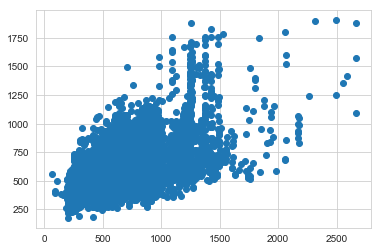

In [45]:
plt.scatter(y_test_original, predicted_original)

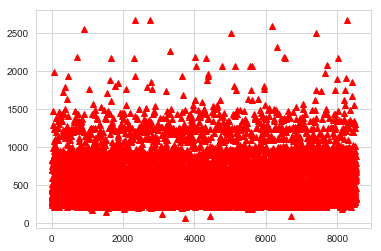

In [46]:
plt.plot(y_test_original,'r^')

Text(0.5, 1.0, 'predicted')

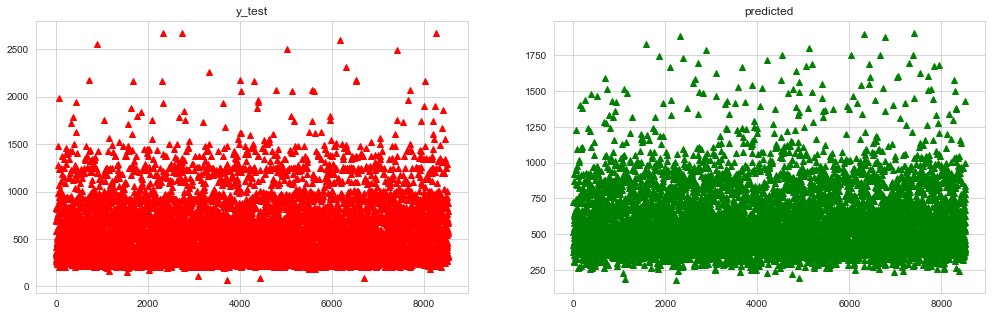

In [47]:
plt.figure(figsize=(17,5))
plt.subplot(121)
plt.plot(y_test_original,'r^',label='y_test')
plt.title('y_test')
plt.subplot(122)
plt.plot(predicted_original,'g^',label = 'predicted')
plt.title('predicted')

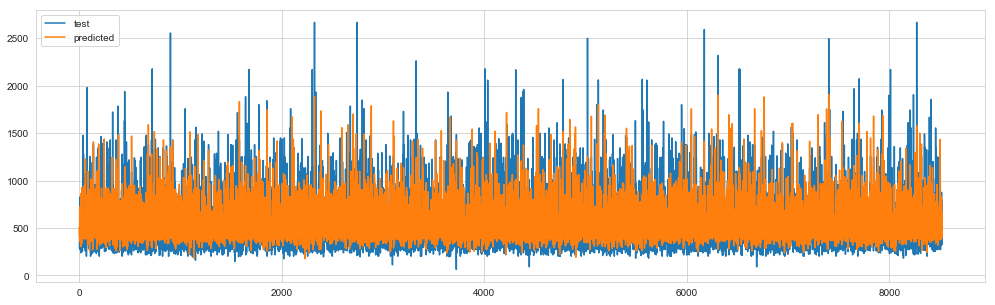

In [48]:
plt.figure(figsize=(17,5))
plt.plot(y_test_original,label='test')
plt.plot(predicted_original,label = 'predicted')
plt.legend()
plt.show()

In [49]:
type(predicted_original)

numpy.ndarray

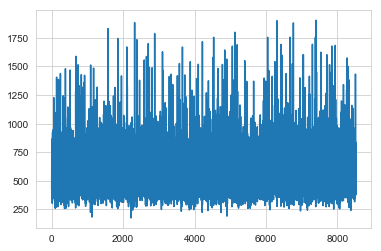

In [50]:
plt.plot(predicted_original)

In [51]:
y_test_original.shape

(8520, 1)

In [52]:
g = pd.DataFrame(y_test_original)

In [53]:
g.head()

,0
0,287.000000
1,364.000000
2,357.000000
3,826.000000
4,420.000031


In [54]:
g['predict'] = predicted_original

In [55]:
g.head()

,0,predict
0,287.000000,423.352814
1,364.000000,514.461548
2,357.000000,374.831421
3,826.000000,725.081909
4,420.000031,545.452454


In [56]:
cols = ['y_test','predict']

In [57]:
g.columns = cols
g.head()

,y_test,predict
0,287.000000,423.352814
1,364.000000,514.461548
2,357.000000,374.831421
3,826.000000,725.081909
4,420.000031,545.452454


No handles with labels found to put in legend.


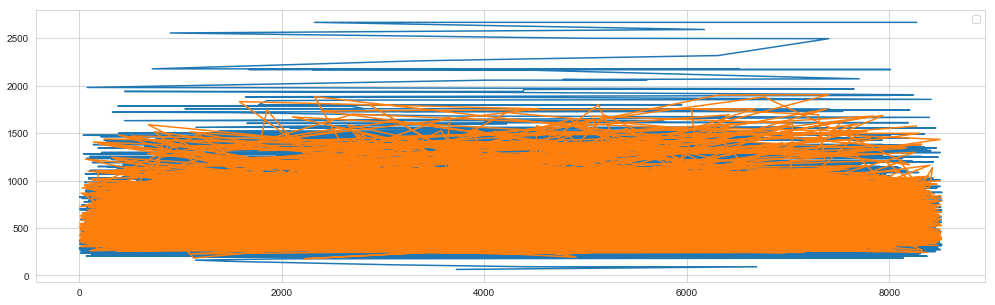

In [58]:
plt.figure(figsize=(17,5))
plt.plot(g.sort_values('y_test'))
plt.legend()
plt.show()

In [59]:
print(g.sort_values('predict',ascending=False))

           y_test      predict
7402  2495.000000  1904.394531
6307  2317.000000  1900.280396
2322  2667.000000  1884.172485
6765  1253.000000  1881.049561
1580  1428.000000  1831.580200
5126  2060.000000  1799.426758
2883  1533.000122  1787.593872
6670  1379.000000  1756.250000
4534  1428.000000  1755.842529
6045  1484.000122  1755.412598
7381  1092.000000  1754.425415
1851  1841.000122  1745.144287
2387  1379.000000  1734.061523
4219  1253.000000  1716.680908
2704  1295.000000  1700.345825
7298  1484.000122  1694.073975
6416  1260.000000  1693.186279
5190  1253.000000  1689.971802
7937  1379.000000  1684.497803
7845  1246.000000  1679.208130
5057  1246.000000  1677.984253
2102  1246.000000  1670.754150
3660  1197.000000  1669.987549
4844  1092.000000  1644.331177
3102  1260.000000  1628.293213
7533  1092.000000  1624.916870
7045  1246.000000  1604.164062
7703  2072.000000  1602.663086
6449  1246.000000  1598.329102
7037  1379.000000  1598.015381
...           ...          ...
8049   4

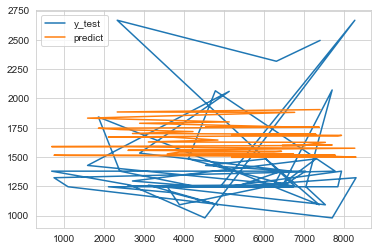

In [60]:
g.sort_values('predict',ascending=False)[:50].plot()

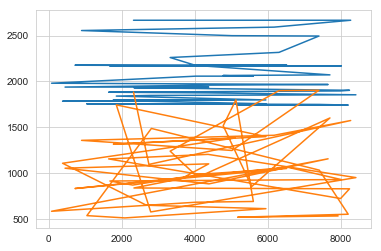

In [61]:
plt.plot(g.sort_values('y_test',ascending=False)[:50])

In [62]:
g = g.sort_values('y_test',ascending=False)
g.head()

,y_test,predict
2322,2667.0,1884.172485
2744,2667.0,1096.726440
8271,2667.0,1574.812866
6173,2592.0,1413.967041
899,2555.0,1358.611816


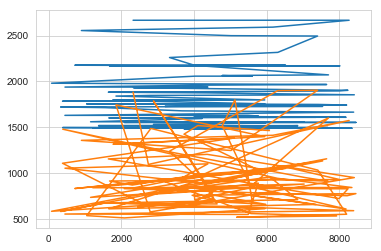

In [63]:
plt.plot(g.y_test[:100])
plt.plot(g.predict[:100])

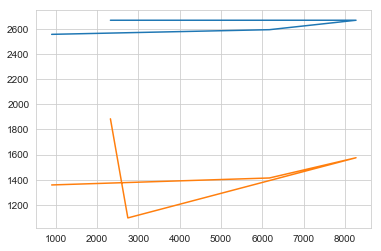

In [69]:
g.y_test[:5].plot()
g.predict[:5].plot()

In [70]:
g.head()

,y_test,predict
2322,2667.0,1884.172485
2744,2667.0,1096.726440
8271,2667.0,1574.812866
6173,2592.0,1413.967041
899,2555.0,1358.611816
